<a href="https://colab.research.google.com/github/BrianMoringa/Core-week-9-IP-Submission/blob/main/Notebook2_Core_module_II_Week_9_Brian_Onchweri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes Classifier - 

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 1. Defining the Question

### a) Specifying the Data Analytic Question

> In this week's IP we are going to look at a practical example of classifying as message beinng spam or not. We have two datasets for this study one containing names and the other containing the data we will be using for our training.

### b) Defining the Metric for Success
Success will depend on whether indeed we get an accurate classification of a text being Spam or Not and defining that with a metric

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance
The data given was indeed relevant for this study.

## 2. Reading the Data

In [39]:
import pandas as pd
# reading csv files
df1 =  pd.read_csv('/content/spambase.data', sep=",")
df1.head()
 

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [40]:
#Reading spambase.names file 
df2=pd.read_table('/content/spambase.names')
df2.head()

,| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
0,|
1,"| 48 continuous real [0,100] attributes of typ..."
2,| = percentage of words in the e-mail that mat...
3,| i.e. 100 * (number of times the WORD appears...
4,"| total number of words in e-mail. A ""word"" i..."


In [41]:
df2.tail()

,| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
81,char_freq_$: continuous.
82,char_freq_#: continuous.
83,capital_run_length_average: continuous.
84,capital_run_length_longest: continuous.
85,capital_run_length_total: continuous.


In [42]:
df2.columns

Index(['| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)'], dtype='object')



## 3. Checking the Data

In [43]:
# Determining the no. of records in our dataset
len(df2)

86

In [44]:
len(df1)

4600

In [45]:
len(df1.columns)

58

In [46]:
df2.columns

Index(['| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)'], dtype='object')

In [47]:
# Previewing the top of our dataset
#
df2.head()

,| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
0,|
1,"| 48 continuous real [0,100] attributes of typ..."
2,| = percentage of words in the e-mail that mat...
3,| i.e. 100 * (number of times the WORD appears...
4,"| total number of words in e-mail. A ""word"" i..."


In [48]:
# Previewing the bottom of our dataset
# 
df2.tail()

,| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
81,char_freq_$: continuous.
82,char_freq_#: continuous.
83,capital_run_length_average: continuous.
84,capital_run_length_longest: continuous.
85,capital_run_length_total: continuous.


In [49]:
# Checking whether each column has an appropriate datatype
#
df2.dtypes

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)    object
dtype: object

In [50]:
# Checking whether each column has an appropriate datatype
#
df1.dtypes

0         float64
0.64      float64
0.64.1    float64
0.1       float64
0.32      float64
0.2       float64
0.3       float64
0.4       float64
0.5       float64
0.6       float64
0.7       float64
0.64.2    float64
0.8       float64
0.9       float64
0.10      float64
0.32.1    float64
0.11      float64
1.29      float64
1.93      float64
0.12      float64
0.96      float64
0.13      float64
0.14      float64
0.15      float64
0.16      float64
0.17      float64
0.18      float64
0.19      float64
0.20      float64
0.21      float64
0.22      float64
0.23      float64
0.24      float64
0.25      float64
0.26      float64
0.27      float64
0.28      float64
0.29      float64
0.30      float64
0.31      float64
0.32.2    float64
0.33      float64
0.34      float64
0.35      float64
0.36      float64
0.37      float64
0.38      float64
0.39      float64
0.40      float64
0.41      float64
0.42      float64
0.778     float64
0.43      float64
0.44      float64
3.756     float64
61        

## 4. External Data Source Validation

This  following link is the source of our information. [Link](https://archive.ics.uci.edu/ml/datasets/Spambase).This information can be backed up by the following link [Link](https://datahub.io/machine-learning/spambase)

## 5. Tidying the Dataset

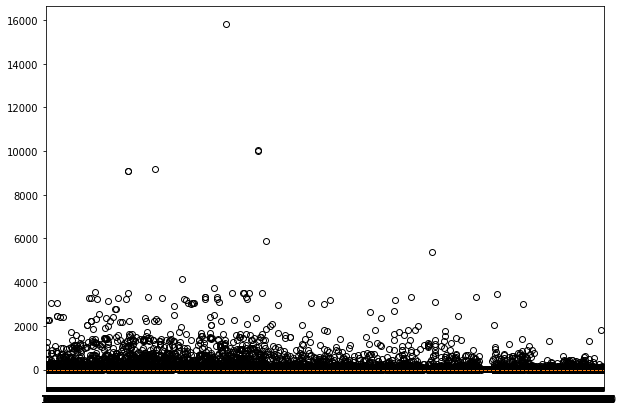

In [51]:
# Checking for Outliers
#
fig = plt.figure(figsize =(10, 7))
bp = plt.boxplot(df1)
plt.show()

In [52]:
# Dealing with the Missing Data
#
df1.isna().sum()

0         0
0.64      0
0.64.1    0
0.1       0
0.32      0
0.2       0
0.3       0
0.4       0
0.5       0
0.6       0
0.7       0
0.64.2    0
0.8       0
0.9       0
0.10      0
0.32.1    0
0.11      0
1.29      0
1.93      0
0.12      0
0.96      0
0.13      0
0.14      0
0.15      0
0.16      0
0.17      0
0.18      0
0.19      0
0.20      0
0.21      0
0.22      0
0.23      0
0.24      0
0.25      0
0.26      0
0.27      0
0.28      0
0.29      0
0.30      0
0.31      0
0.32.2    0
0.33      0
0.34      0
0.35      0
0.36      0
0.37      0
0.38      0
0.39      0
0.40      0
0.41      0
0.42      0
0.778     0
0.43      0
0.44      0
3.756     0
61        0
278       0
1         0
dtype: int64

We have no missing values by the look of things.

In [53]:
# More data cleaning procedures
#
df1.duplicated().sum()

391

## 7. Implementing the Solution

In [54]:
# Implementing the Solution
# 
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [69]:
df1custom=df1.iloc[:86]

In [70]:
df1custom.shape

(86, 58)

In [68]:
df2.shape

(86, 1)

In [71]:
X=df1custom
y=df2['| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)']

In [72]:

# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6) 

In [74]:
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [75]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.07692307692307693


## 8. Challenging the solution

>We can try validate our output above with a different machine learning algorithm which will go ahead to learn different contents in the emails and classify them as spam or ham.






## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?
Not Absolutely as the columns were poorly labelled.

### b). Do we need other data to answer our question?
Yes we Do

### c). Did we have the right question?
Yes